In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
X_train =pd.read_excel('/content/drive/MyDrive/NNFL Assignment/Q3_data/Xtr.xlsx');
X_test =pd.read_excel('/content/drive/MyDrive/NNFL Assignment/Q3_data/Xte.xlsx');
Y_train =pd.read_excel('/content/drive/MyDrive/NNFL Assignment/Q3_data/Ytr.xlsx');
Y_test =pd.read_excel('/content/drive/MyDrive/NNFL Assignment/Q3_data/Yte.xlsx');


In [4]:
print(X_train)
print(X_test.shape)
print(Y_train.shape)
print(Y_test)
print(Y_test.shape)

      242.751526  281.801298  250.032405  ...  1.603211    1.281972    1.844860  
0     216.585951  297.057883  300.938478  ...    1.572927    1.598582    1.625395
1     265.735536  339.271134  269.817305  ...    1.849940    1.848160    1.706134
2     207.631953  255.284282  254.563071  ...    1.682881    1.710404    1.664391
3     205.016124  333.265999  536.342842  ...    1.740251    1.703264    1.535684
4     195.777116  284.978457  351.491093  ...    1.643778    1.834746    1.731494
...          ...         ...         ...  ...         ...         ...         ...
1583  665.391855  494.366515  443.407866  ...    1.695298    1.795109    1.492727
1584  339.816405  175.630241  269.201049  ...    1.710592    1.481917    1.783480
1585  556.132519  235.733722  220.828873  ...    1.984738    1.914010    1.843007
1586  719.112452  341.105932  312.378736  ...    1.653615    1.710778    1.810020
1587  852.985752  314.878301  596.409431  ...    1.722815    1.601319    2.050582

[1588 rows x 60

In [5]:
xmin = np.min(X_train, axis = 0)
xmax = np.max(X_train, axis = 0)
X_train = (X_train- xmin)/(xmax-xmin) 

xmin = np.min(X_test, axis = 0)
xmax = np.max(X_test, axis = 0)
X_test = (X_test- xmin)/(xmax-xmin) 

xmin = np.min(Y_train, axis = 0)
xmax = np.max(Y_train, axis = 0)
Y_train = (Y_train- xmin)/(xmax-xmin) 

xmin = np.min(Y_test, axis = 0)
xmax = np.max(Y_test, axis = 0)
Y_test = (Y_test- xmin)/(xmax-xmin) 

In [6]:
print((X_train))
print(Y_train)

      242.751526  281.801298  250.032405  ...  1.603211    1.281972    1.844860  
0       0.141864    0.243093    0.347017  ...    0.248965    0.764688    0.518052
1       0.193693    0.292870    0.291655  ...    0.675705    0.884074    0.587941
2       0.132422    0.193835    0.264519  ...    0.418349    0.818178    0.551807
3       0.129663    0.285789    0.765780  ...    0.506728    0.814763    0.440395
4       0.119921    0.228850    0.436945  ...    0.358111    0.877658    0.609894
...          ...         ...         ...  ...         ...         ...         ...
1583    0.615141    0.475754    0.600457  ...    0.437478    0.858697    0.403211
1584    0.271814    0.099909    0.290559  ...    0.461038    0.708880    0.654893
1585    0.499924    0.170782    0.204509  ...    0.883363    0.915574    0.706422
1586    0.671790    0.295034    0.367368  ...    0.373265    0.818357    0.677867
1587    0.812963    0.264107    0.872633  ...    0.479868    0.765997    0.886103

[1588 rows x 60

In [7]:
m=len(X_train)
pp = np.ones([m, 1]) 
X_train = np.append(pp,X_train, axis=1)

m=len(X_test)
pp = np.ones([m, 1]) 
X_test = np.append(pp,X_test, axis=1)


In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1588, 61)
(118, 61)
(1588, 1)
(118, 1)


In [9]:
def sigmoid(z):
  return 1.0/(1 + np.exp(-z))

In [15]:
def cost_function(X_train,y,w,lamb):
  hypothesis = sigmoid(np.dot(X_train,w.T)) 
  J =-(1/m)*(np.sum(y*(np.log(hypothesis)) + (1-y)*np.log(1-hypothesis))) + (lamb/2)*np.sum(w)
  return J


In [16]:
def batch_gradient_descent(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters) 

  for i in range(iters):
    hypothesis = sigmoid(np.dot(X_train,w.T))
    w = (w-(alpha*lamb*np.sign(w))) - (alpha/len(y)) * (np.dot((X.T) , (hypothesis - y))).T
    cost_history[i] = cost_function(X,y,w,lamb)
  return w,cost_history

In [17]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size,lamb):
  cost_history = np.zeros(iters)

  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = (w-(alpha*lamb*np.sign(w))) - (alpha/batch_size) * (ind_x.T.dot(sigmoid(ind_x.dot(w.T)) - ind_y)).T
    cost_history[i] = cost_function(ind_x,ind_y,w,lamb)
  return w, cost_history

In [18]:
def stochastic_gradient_descent(X,y,w,alpha, iters,lamb):
  cost_history = np.zeros(iters)

  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = (w-(alpha*lamb*np.sign(w))) - alpha * (ind_x.T.dot(sigmoid(ind_x.dot(w.T)) - ind_y)).T
    cost_history[i] = cost_function(ind_x,ind_y,w,lamb)
  return w, cost_history

In [19]:
w= np.zeros((1 , X_train.shape[1])) 
#w = np.random.randn(1 , X_train.shape[1]).ravel()
print(w.shape)


(1, 61)


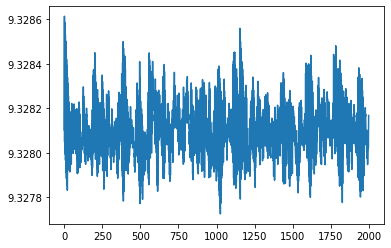

In [20]:
alpha=0.005 ##learning rate
iters=2000 ###iterations
lamb=0.1
batch_w,J_his = batch_gradient_descent(X_train,Y_train,w,alpha,iters,lamb)
plt.plot(range(iters),J_his)
plt.show()

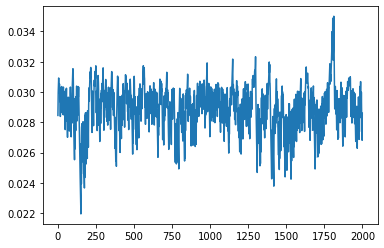

In [23]:
alpha=0.001
iters=2000
batch_size=5
lamb=0.1
mini_batch_w,J_mini_batch = MB_gradient_descent(X_train,Y_train,w,alpha,iters, batch_size,lamb)
plt.plot(range(iters),J_mini_batch)
plt.show()


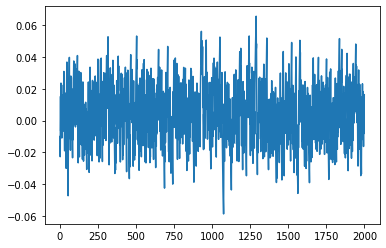

In [24]:
n_epochs=2000
alpha=0.02
lamb=0.1
w_n,J_sgd = stochastic_gradient_descent(X_train,Y_train,w, alpha, n_epochs,lamb)
plt.plot(range(n_epochs),J_sgd)
plt.show()


In [25]:
z = np.dot(X_test, batch_w.T)

print(z.T)

[[ 8.88657442e-04  8.43130923e-04 -2.58604387e-05  9.93059216e-05
   1.02262483e-03  2.07703750e-04  4.12741679e-04 -1.70381049e-04
   1.24881243e-05 -9.44434239e-05 -2.08503573e-04  3.80265118e-05
   1.64593689e-04 -6.17877402e-05  1.03897710e-03  4.17239065e-04
   7.30805260e-04  5.96898693e-04  6.86100801e-04  7.61174076e-04
   9.96177140e-04  4.99731006e-04  1.79410986e-04  6.59655301e-04
  -1.92161860e-04  1.12128669e-03  6.97963001e-04  7.74813717e-05
   6.50922640e-04  6.24185319e-04 -2.15224136e-04  2.46723430e-04
   2.30017524e-04 -2.18323659e-04  7.34774023e-04  6.47696824e-04
   6.75442679e-04 -8.73269189e-05  5.44871128e-04  6.81192714e-04
   4.21125840e-04  6.97791521e-04  4.18052601e-04 -3.00107353e-04
   8.01396674e-04  2.29029719e-04  2.71510943e-04  6.31674518e-04
   4.88638747e-04  7.70910593e-04  5.29446232e-04  5.40767616e-04
   1.04883035e-03  2.22263911e-04  6.17831513e-04  6.28415366e-04
  -1.90592338e-04  6.15398449e-04 -3.06350516e-05  6.77077535e-04
   6.35031

In [26]:
h = sigmoid(z)
y_pred=h>0.5
y_pred=y_pred.astype(int)
print(y_pred.T)

[[1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1
  1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 0 1 1 1 1]]


In [27]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, y_pred)
print(cm)

[[11 46]
 [ 7 54]]


In [28]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

sens= TP / float(TP+FN)
print(sens)

# Let us calculate specificity

spec= TN / float(TN+FP)
print(spec)

0.8852459016393442
0.19298245614035087


In [29]:
accuracy=(cm[0][0]+cm[1][1])/(len(Y_test))
test_accuracy= np.sum(Y_test == y_pred) / len(Y_test)
print(test_accuracy)


1.0    0.550847
dtype: float64


In [30]:

z = np.dot(X_test, mini_batch_w.T)

print(z.T)

[[-0.01181132 -0.01188645 -0.00810654 -0.0101868  -0.01149901 -0.01046285
  -0.00992002 -0.00807338 -0.01134927 -0.01111493 -0.00969541 -0.01024959
  -0.01018529 -0.01109667 -0.01116227 -0.01104622 -0.01023382 -0.01091759
  -0.01184471 -0.01050837 -0.01098556 -0.01060771 -0.00982558 -0.01037619
  -0.01140947 -0.01019224 -0.0116334  -0.0104891  -0.01014421 -0.01153915
  -0.01062447 -0.01019766 -0.01057454 -0.01119042 -0.01121924 -0.01027062
  -0.01006692 -0.01125215 -0.01007536 -0.01177979 -0.01003201 -0.01099517
  -0.00896335 -0.0110513  -0.00998736 -0.01117562 -0.00971793 -0.0094555
  -0.00932863 -0.00947462 -0.0109956  -0.01125441 -0.01019526 -0.0110867
  -0.0118283  -0.01094522 -0.01080281 -0.01067914 -0.00991993 -0.01033141
  -0.00908622 -0.00957343 -0.01019105 -0.00864457 -0.00940221 -0.0091096
  -0.01000653 -0.01040333 -0.00982508 -0.00918217 -0.01043291 -0.01000357
  -0.00949732 -0.0106637  -0.0090717  -0.00994403 -0.01039145 -0.01081939
  -0.01054146 -0.00838485 -0.01042465 -0.

In [31]:
h = sigmoid(z)
y_pred=h>0.5
y_pred=y_pred.astype(int)
print(y_pred.T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0]]


In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, y_pred)
print(cm)

[[57  0]
 [61  0]]


In [33]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

sens= TP / float(TP+FN)
print(sens)

# Let us calculate specificity

spec= TN / float(TN+FP)
print(spec)

0.0
1.0


In [34]:
accuracy=(cm[0][0]+cm[1][1])/(len(Y_test))
test_accuracy= np.sum(Y_test == y_pred) / len(Y_test)
print(test_accuracy)



1.0    0.483051
dtype: float64


In [37]:
z = np.dot(X_test, w_n.T)
print(z.T)

[[0.11263571 0.10185171 0.08093872 0.08958075 0.0969261  0.10627457
  0.09824543 0.08975792 0.10263024 0.09598498 0.08758353 0.10240009
  0.09594793 0.09823994 0.10399215 0.11951696 0.1021177  0.10312869
  0.0948267  0.08157996 0.09974107 0.08609761 0.07950399 0.09549714
  0.09973999 0.09465827 0.10498699 0.10565013 0.08930969 0.10075796
  0.08582666 0.08580199 0.09577846 0.10721654 0.09948657 0.08584102
  0.10944568 0.1145026  0.09402407 0.09317753 0.09299689 0.08061846
  0.11861082 0.10144594 0.08518719 0.10983857 0.07222737 0.07068721
  0.10518959 0.11819879 0.10980157 0.09905887 0.08161367 0.09061154
  0.09075187 0.10585954 0.09057486 0.11550169 0.09076182 0.10002742
  0.07749885 0.07921501 0.0819632  0.08112498 0.09353779 0.10363472
  0.09266304 0.08519666 0.09316568 0.09368657 0.08953336 0.09467612
  0.08421475 0.0997344  0.09840666 0.10135117 0.09859974 0.09704142
  0.08864454 0.07679096 0.08379572 0.08403323 0.08964717 0.09647713
  0.08860962 0.079991   0.09139144 0.09571125 0.

In [38]:
h = sigmoid(z)
y_pred=h>0.5
y_pred=y_pred.astype(int)
print(y_pred.T)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test, y_pred)
print(cm)

[[37 20]
 [45 16]]


In [ ]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model

sens= TP / float(TP+FN)
print(sens)

# Let us calculate specificity

spec= TN / float(TN+FP)
print(spec)

0.26229508196721313
0.6491228070175439


In [ ]:
accuracy=(cm[0][0]+cm[1][1])/(len(Y_test))
test_accuracy= np.sum(Y_test == y_pred) / len(Y_test)
print(test_accuracy)


1.0    0.449153
dtype: float64
